<a href="https://colab.research.google.com/github/pranav-kaushal/NLP-Project-Sentiment-Analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scotiabank Twitter Sentiment Analysis

API account
https://developer.twitter.com/en/portal/dashboard

In [ ]:
# Install Libraries
#!pip install textblob
#!pip install tweepy
#!pip install langdetect
#!pip install nltk
#!pip install unidecode

In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy  # https://docs.tweepy.org/en/latest/getting_started.html#introduction
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string
!pip install unidecode
!pip install textaugment

import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw')
nltk.download('stopwords')
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
import unidecode
import spacy
import unicodedata

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

     |████████████████████████████████| 245kB 13.7MB/s 
     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 1.0MB 13.0MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp37-none-any.whl size=15737 sha256=8e49c7f91ea08201c284c41ff3a9fd62c3dbf20fca82fd1d331d4d5bd6ac10f6
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
Successfully built googletrans
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Authentication Keys (Individual Account)

In [3]:
# Authentication
consumerKey = "Gqxmwe06eIqw0NBmCi0L1rmbh"
consumerSecret = "cborR6m0P5LnLB1U2WV4Wz4zI4Wazs9BE1v31x2bcMeeSkm0pf"
accessToken = "1378575615981457409-Aotg3k1WfJu8l8kM8sbs2utHbTFeaO"
accessTokenSecret = "RmH71WeV1XyF66veJJh78vILJ5lt5MqaNNPpbQqZ8E2jm"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

# Gathering Tweets- Tweet cap 
500,000 Tweets / month
PER PROJECT

In [175]:
#Keyword Search and No of Tweets to capture
tweet_list=[]
users = ['@globeinvestor','@bloombergCA','@Marketcall','@LA&C Investments','@TheMotleyFoolCA','@BNNBloomberg','@YahooFinanceCA','@StockTrades_CA','@rcarrick','@marketsglobe','@PattieCTV','@Streetwise','@stockchase',
'@financialpost','@FinMKTG','@JonChevreau','@MoneySense','@BoomerandEcho','@squawkfox','@reformedbroker','@thestalwart' ,'@michaelbabad','@FTalphaville','@dbcurren',
'@benrabidoux','@noahpinion','@boes_','@sbarlow_ROB','@amberkanwar','@business','@elerianm','@reutersjamie','@M_C_Klein',
'@economistmeg','@tylercowen','@nictrades','@ReformedBroker','@TheStalwart','@VitalikButerin','@ritholtz','@LizAnnSonders',
'@IvanTheK','@charliebilello','@satoshilite',
'@ritholtz','@awealthofcs','@RaoulGMI','@MarkYusko','@allstarcharts','@5_min_macro','@longshorttrader','@ScottMinerd','@Callum_Thomas','@RyanDetrick','@TheBubbleBubble','@KeithMcCullough',
'@Ukarlewitz','@cullenroche','@DougKass']
for user in users:
    tweets = api.user_timeline(screen_name = user, count = 1, lang = "en", tweet_mode = "extended", retry_errors= 34)
    for tweet in tweets:
      tweet_list.append(tweet.full_text)
      print (tweet.full_text)
    #print(f"- {tweet.full_text}")

Fifteen steady small cap stocks https://t.co/EETTd1VgG7
RT @Quicktake: ⚡️ 🏠 The #Covid19 pandemic has dramatically reshaped real estate — but that doesn't mean home prices have suddenly become ch…
RT @BrookeThackray: I am on BNN Bloomberg Market Call today at 12PM ET. Please join for market update and to ask questions. @marketcall htt…
Value investors! Here's one industrial stock you can hold for a long time. 

https://t.co/n5W6i7avP5
Manulife core earnings surge in Q1 on contribution from higher new business
https://t.co/qZ9kjvMwdi https://t.co/HgGsTWH3Ng
Toronto housing market: Detached homes cool while condos continue to sizzle

From @jessysbains 

https://t.co/VAFaKP15cc
Ballard Power $BLDP has gotten wrecked as of late. down 57% from all time highs. Even with this collapse, stock is still trading at 27X forward sales. Company has been underperforming for more than 2 decades. Earnings miss doesn't help. https://t.co/xU7eKGYc3V
Context for when you're reading about housing in Toront

User methods
API.get_user(id/user_id/screen_name)
Returns information about the specified user.

Parameters:	
id – Specifies the ID or screen name of the user.
user_id – Specifies the ID of the user. Helpful for disambiguating when a valid user ID is also a valid screen name.
screen_name – Specifies the screen name of the user. Helpful for disambiguating when a valid screen name is also a user ID.
Return type:	
User object

In [176]:
# Print and analyze the tweets in raw text
tweet_list[0:10]

['Fifteen steady small cap stocks https://t.co/EETTd1VgG7',
 "RT @Quicktake: ⚡️ 🏠\xa0The #Covid19 pandemic has dramatically reshaped real estate — but that doesn't mean home prices have suddenly become ch…",
 'RT @BrookeThackray: I am on BNN Bloomberg Market Call today at 12PM ET. Please join for market update and to ask questions. @marketcall htt…',
 "Value investors! Here's one industrial stock you can hold for a long time. \n\nhttps://t.co/n5W6i7avP5",
 'Manulife core earnings surge in Q1 on contribution from higher new business\nhttps://t.co/qZ9kjvMwdi https://t.co/HgGsTWH3Ng',
 'Toronto housing market: Detached homes cool while condos continue to sizzle\n\nFrom @jessysbains \n\nhttps://t.co/VAFaKP15cc',
 "Ballard Power $BLDP has gotten wrecked as of late. down 57% from all time highs. Even with this collapse, stock is still trading at 27X forward sales. Company has been underperforming for more than 2 decades. Earnings miss doesn't help. https://t.co/xU7eKGYc3V",
 'Context for whe

In [177]:
# To view full text in pandas dataset
pd.set_option('display.max_colwidth', None)

# Renaming 0 column header to tweets
tweet_list.columns = ['tweets']

#tweet_list.head(5)

In [178]:
# Converting the list to Dataframe for further exploration
tw_list = pd.DataFrame(tweet_list)
#tw_list["text"] = tw_list[0]
#tw_list.to_excel("alltweets.xlsx")  ----- These have already been downloaded

In [180]:
tw_list.head(100)

,0
0,Fifteen steady small cap stocks https://t.co/EETTd1VgG7
1,RT @Quicktake: ⚡️ 🏠 The #Covid19 pandemic has dramatically reshaped real estate — but that doesn't mean home prices have suddenly become ch…
2,RT @BrookeThackray: I am on BNN Bloomberg Market Call today at 12PM ET. Please join for market update and to ask questions. @marketcall htt…
3,Value investors! Here's one industrial stock you can hold for a long time. \n\nhttps://t.co/n5W6i7avP5
4,Manulife core earnings surge in Q1 on contribution from higher new business\nhttps://t.co/qZ9kjvMwdi https://t.co/HgGsTWH3Ng
5,Toronto housing market: Detached homes cool while condos continue to sizzle\n\nFrom @jessysbains \n\nhttps://t.co/VAFaKP15cc
6,"Ballard Power $BLDP has gotten wrecked as of late. down 57% from all time highs. Even with this collapse, stock is still trading at 27X forward sales. Company has been underperforming for more than 2 decades. Earnings miss doesn't help. https://t.co/xU7eKGYc3V"
7,"Context for when you're reading about housing in Toronto ""cooling"" in April. https://t.co/In12Qgllcj"
8,Premarket: Europe leads stock market recovery on firmer business growth https://t.co/40NGV3zNeu (subscribers)
9,@KelleyKeehn Thanks Kelley. 😊


In [ ]:
# Create a copy of the dataframe to work on
tw_list1 = tw_list.copy()

In [ ]:
# Now, we can use pandas read_excel after installing the excel importer.
!pip install -q xlrd
tw_list1 = pd.read_excel('/content/sample_data/alltweets.xlsx')


In [ ]:
tw_list1

,tweets
0,RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…
1,@SaddyFandino @PoliciaColombia @AlvaroUribeVel Le recuerdo los saqueos de Cali?\n\nAdemás ellos llevan toda la semana… https://t.co/xi2ZqGatqJ
2,RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…
3,RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…
4,"RT @scotiabank: 1/2 Congratulations to the winners of the Canadian Foundation for Economic Education’s Virtual Money Fair, sponsored by Sco…"
...,...
1995,"RT @NHL: 🍁 OH, CANADA! 🍁\n\nThe @MapleLeafs are the first in the @scotiabank North Division to clinch a spot in the #StanleyCup Playoffs! htt…"
1996,@whatsup29832102 @MathisVaillanc1 @NickSuzukisNose @SamTML10 @NHL @MapleLeafs @scotiabank LMAO BRO WHAT DOES WAR HAVE TO DO WITH THIS
1997,@KristinYoun9 @NHL @MapleLeafs @scotiabank They just said that they were the first team to clinch a playoff spot 😂. Let it go Karen.
1998,RT @TheChampions: Vote now for the Scotiabank Man of the Match between @ColumbusCrewSC and @Rayados | #SCCL21 @ScotiabankFC https://t.co/ba…


## Using Pipeline to clean text

In [ ]:
# Check for duplicates and drop them.
tw_list1['tweets'].drop_duplicates(inplace = True)

In [ ]:
tw_list1.count()

tweets    2000
dtype: int64

Make text lowercase
Remove punctuation
Remove emoji’s
Remove stopwords
Lemmatization

In [ ]:
#Cleaning pipeline (RT, Punctuation etc)
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english') + stopwords.words('spanish')+['http','rt','https'])

lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    #Removing RT
    x = re.sub('RT @\w+: '," ",x)

    # Remove all single characters
    x = re.sub(r'\s+[a-zA-Z]\s+', ' ',x)

    # Remove punctuation
    x = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
    
    # Lower case
    x = x.lower()

    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [ ]:
# Test preprocessing pipeline
preprocess('@ RT http t co pbxlonxhsj michael retamal scotiabank')

'co pbxlonxhsj michael retamal scotiabank'

In [ ]:
# Tweets before preprocessing
tw_list2 = tw_list1.values.tolist()

In [ ]:
# Import re module to use regular expression
import re
# Declare a list that contains the search word
search_word = "playoff"
list1 = []
# Using lambda expression filter the data
for x in tw_list1['tweets']:
  if "playoff" not in x:
    list1.append(x)
  elif "arena" not in x:
    list1.append(x)
  elif "game" not in x:
    list1.append(x)
  elif "hockey" not in x:
    list1.append(x)




In [ ]:
list1

['RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 '@SaddyFandino @PoliciaColombia @AlvaroUribeVel Le recuerdo los saqueos de Cali?\n\nAdemás ellos llevan toda la semana… https://t.co/xi2ZqGatqJ',
 'RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 'RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 'RT @scotiabank: 1/2 Congratulations to the winners of the Canadian Foundation for Economic Education’s Virtual Money Fair, sponsored by Sco…',
 'RT @ScotiaEconomics: Canadian GDP is likely to grow 6.6% Q/Q SAAR in 21Q1, loosening restrictions driving industry-level GDP up 0.4% m/m in…',
 'RT @ScotiaEconomics: #Latam Daily for April 30: #Peru BCRP institutes interest-rate cap, presidential candidates spar as new p

In [ ]:
tweet_list = pd.DataFrame(list1)

In [ ]:
tweet_list.head()

,tweets
0,vima aqu hsbc banco rothschild qu dedican hace juno imperio brit
1,recuerdo saqueos cali adem llevan toda semana
2,vima aqu hsbc banco rothschild qu dedican hace juno imperio brit
3,vima aqu hsbc banco rothschild qu dedican hace juno imperio brit
4,congratulation winner canadian foundation economic education virtual money fair sponsored sco


In [ ]:
tweet_list.columns=['tweets']

In [ ]:
# Apply Preprocessing pipeline to Tweets Dataframe

tweet_list['tweets'] = tweet_list['tweets'].apply(preprocess)

In [ ]:
tweet_list

,tweets
0,vima aqu hsbc banco rothschild qu dedican hace juno imperio brit
1,recuerdo saqueos cali adem llevan toda semana
2,vima aqu hsbc banco rothschild qu dedican hace juno imperio brit
3,vima aqu hsbc banco rothschild qu dedican hace juno imperio brit
4,congratulation winner canadian foundation economic education virtual money fair sponsored sco
...,...
1995,oh canada first north division clinch spot stanleycup playoff htt
1996,lmao bro war
1997,said first team clinch playoff spot let go karen
1998,vote scotiabank man match sccl


## Sentiment Analysis using TextBlob

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tweet_list[['polarity', 'subjectivity']] = tweet_list['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list['tweets'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweet_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweet_list.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list.loc[index, 'sentiment'] = "neutral"
    tweet_list.loc[index, 'neg'] = neg
    tweet_list.loc[index, 'neu'] = neu
    tweet_list.loc[index, 'pos'] = pos
    tweet_list.loc[index, 'compound'] = comp

tweet_list.head(10)

,tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,vima aqu hsbc banco rothschild qu dedican hace juno imperio brit,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,recuerdo saqueos cali adem llevan toda semana,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,vima aqu hsbc banco rothschild qu dedican hace juno imperio brit,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,vima aqu hsbc banco rothschild qu dedican hace juno imperio brit,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,congratulation winner canadian foundation economic education virtual money fair sponsored sco,0.450000,0.550000,positive,0.000,0.444,0.556,0.8750
5,canadian gdp likely grow q q saar q loosening restriction driving industry level gdp,0.000000,1.000000,negative,0.174,0.826,0.000,-0.2732
6,latam daily april peru bcrp institute interest rate cap presidential candidate spar new poll show gap,0.068182,0.227273,positive,0.000,0.833,0.167,0.4588
7,anyone catch north division stanleycup,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,oh canada first north division clinch spot stanleycup playoff htt,0.250000,0.333333,neutral,0.000,1.000,0.000,0.0000
9,well know dirty dont get close enuff anyone,-0.600000,0.800000,negative,0.264,0.545,0.191,-0.2023


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tweet_list[tweet_list["sentiment"]=="negative"]
tw_list_positive = tweet_list[tweet_list["sentiment"]=="positive"]
tw_list_neutral = tweet_list[tweet_list["sentiment"]=="neutral"]

In [ ]:
tw_list_negative.head()

,tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
5,canadian gdp likely grow q q saar q loosening restriction driving industry level gdp,0.000000,1.000000,negative,0.174,0.826,0.000,-0.2732
9,well know dirty dont get close enuff anyone,-0.600000,0.800000,negative,0.264,0.545,0.191,-0.2023
17,scotiabank lawyer thought got client bank easy lawsuit loss losing,0.433333,0.833333,negative,0.433,0.382,0.185,-0.4404
39,funding mean funding disastrous project like line tar sand pipeline line would da,-0.506250,0.743750,negative,0.224,0.632,0.144,-0.3400
41,montreal keep losing way sure catch,0.500000,0.888889,negative,0.292,0.449,0.258,-0.0772


In [ ]:
#Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tweet_list,"sentiment")

,Total,Percentage
neutral,1431,71.55
positive,422,21.10
negative,147,7.35


<function matplotlib.pyplot.show>

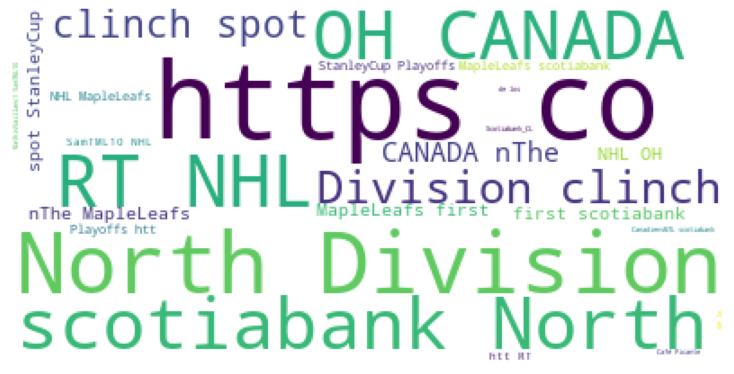

In [ ]:
# Creating Wordcloud for all tweets

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
WC = WordCloud(stopwords=stopwords,max_words=25,
               background_color="white").generate(tw_list1['tweets'].to_string())

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show

<function matplotlib.pyplot.show>

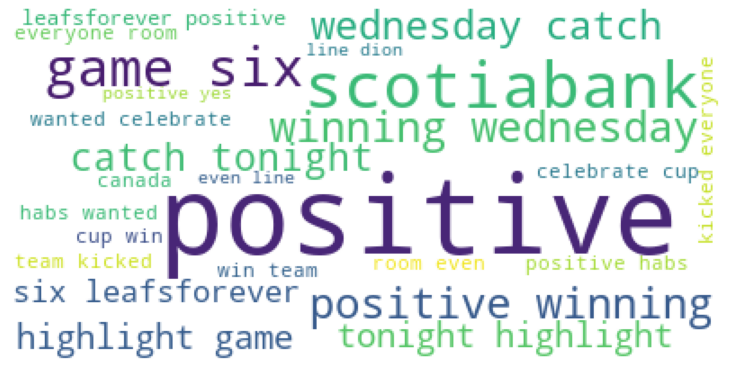

In [ ]:
# Creating to Wordcloud for Positive tweets

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
WC = WordCloud(stopwords=stopwords,max_words=25,
               background_color="white").generate(tw_list_positive.to_string())

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show

<function matplotlib.pyplot.show>

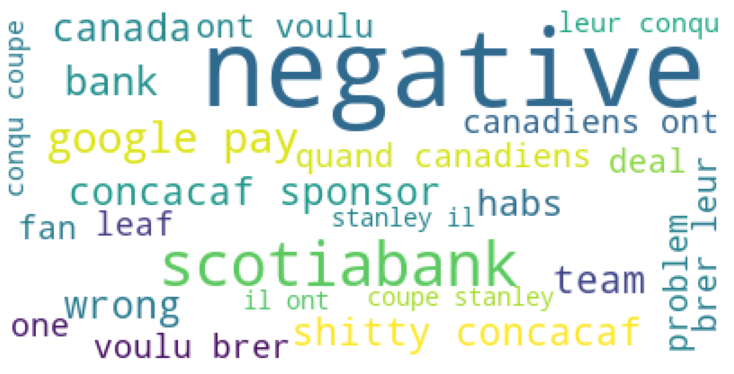

In [ ]:
# Creating to Wordcloud for Positive tweets

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
WC = WordCloud(stopwords=stopwords,max_words=25,
               background_color="white").generate(tw_list_negative.to_string())

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show

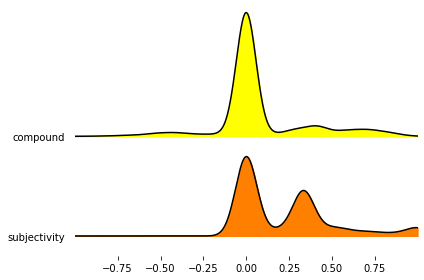

In [ ]:
#!pip install joypy
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib inline
fig, axes = joypy.joyplot(tweet_list, column=['compound','subjectivity'], colormap=cm.autumn_r, x_range=[-1,0,1])

References:
https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

## WIP on the list to be sorted for key words like " arena, playoffs, etc"

In [ ]:
tw_list1

,tweets
0,RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…
1,@SaddyFandino @PoliciaColombia @AlvaroUribeVel Le recuerdo los saqueos de Cali?\n\nAdemás ellos llevan toda la semana… https://t.co/xi2ZqGatqJ
2,RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…
3,RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…
4,"RT @scotiabank: 1/2 Congratulations to the winners of the Canadian Foundation for Economic Education’s Virtual Money Fair, sponsored by Sco…"
...,...
1995,"RT @NHL: 🍁 OH, CANADA! 🍁\n\nThe @MapleLeafs are the first in the @scotiabank North Division to clinch a spot in the #StanleyCup Playoffs! htt…"
1996,@whatsup29832102 @MathisVaillanc1 @NickSuzukisNose @SamTML10 @NHL @MapleLeafs @scotiabank LMAO BRO WHAT DOES WAR HAVE TO DO WITH THIS
1997,@KristinYoun9 @NHL @MapleLeafs @scotiabank They just said that they were the first team to clinch a playoff spot 😂. Let it go Karen.
1998,RT @TheChampions: Vote now for the Scotiabank Man of the Match between @ColumbusCrewSC and @Rayados | #SCCL21 @ScotiabankFC https://t.co/ba…


In [ ]:
# Import re module to use regular expression
import re
# Declare a list that contains the search word
search_word = "playoff"
list1 = []
# Using lambda expression filter the data
for x in tw_list1['tweets']:
  if "playoff" not in x:
    list1.append(x)
  if "arena" not in x:
    list1.append(x)

In [ ]:
list1

['RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 'RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 '@SaddyFandino @PoliciaColombia @AlvaroUribeVel Le recuerdo los saqueos de Cali?\n\nAdemás ellos llevan toda la semana… https://t.co/xi2ZqGatqJ',
 '@SaddyFandino @PoliciaColombia @AlvaroUribeVel Le recuerdo los saqueos de Cali?\n\nAdemás ellos llevan toda la semana… https://t.co/xi2ZqGatqJ',
 'RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 'RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 'RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con 